In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
import sklearn as sk
from scipy import stats

Here we will import the data sets. One set 'df_c' has daily values for curencies of nations as compared to the U.S., df_l_a has labor statisitics for Australia, and df_l_us has labor statisitcs for the U.S. All labor data is taken on a monthly basis. We will attempt to see if any of the labor force data taken at a one month lag can be used to predict the monthly value of currency. Australia will be a test case and we will use this to examine other nations as well.

In [2]:
df_l_us = pd.read_csv('/home/hdawg/Labor_currency_project/Preliminary_exploration/X01_A.csv')
df_l_us.head()

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_source
0,X01,POP_2LDR_NOC_RT,XA:8405,NaN,NaN,NaN,1991,1.377039,NaN
1,X01,POP_2LDR_NOC_RT,XA:8405,NaN,NaN,NaN,1992,1.374936,NaN
2,X01,POP_2LDR_NOC_RT,XA:8405,NaN,NaN,NaN,1993,1.379589,NaN
3,X01,POP_2LDR_NOC_RT,XA:8405,NaN,NaN,NaN,1994,1.376969,NaN
4,X01,POP_2LDR_NOC_RT,XA:8405,NaN,NaN,NaN,1995,1.376760,NaN


In [3]:
df_l_a = pd.read_csv('/home/hdawg/Labor_currency_project/AUS_M.csv')
#df_l_a['time'] = pd.to_datetime(df_l_a['time']) 
df_l_a

/home/hdawg/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source
0,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_TOTAL,NaN,1978M02,10489.3300,NaN,I12:422,NaN
1,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y15-24,NaN,1978M02,2474.7200,NaN,I12:422,NaN
2,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y25-34,NaN,1978M02,2245.1291,NaN,I12:422,NaN
3,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y35-44,NaN,1978M02,1633.9400,NaN,I12:422,NaN
4,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y45-54,NaN,1978M02,1544.2570,NaN,I12:422,NaN
...,...,...,...,...,...,...,...,...,...,...,...
325059,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M09,3.6500,NaN,I12:422,R1:3139
325060,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2019M12,1.8400,NaN,I12:422,R1:3139
325061,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M12,6.5400,NaN,I12:422,R1:3139
325062,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2020M03,2.1900,NaN,I12:422,R1:3139


In [4]:
df_l_a.shape

(325064, 11)

Here we make an artificial date and month column in the labor dateframe. This is intended for later use if it occurs that we need to explore the monthly or yearly trends in more depth.

In [5]:
#print(df_l_a.time)
df_l_a = pd.concat([df_l_a, df_l_a['time'].str.split('M', expand=True)], names = ['Year', 'Month'], axis = 1)
#df_l_a.drop(columns = [0, 1], axis = 1, inplace = True)
df_l_a.rename(columns = {0:'Year', 1:'Month'}, inplace = True)
print(df_l_a.columns)

Index(['ref_area', 'indicator', 'source', 'sex', 'classif1', 'classif2',
       'time', 'obs_value', 'note_classif', 'note_indicator', 'note_source',
       'Year', 'Month'],
      dtype='object')


In [6]:
df_l_a = df_l_a[['ref_area', 'indicator', 'source', 'sex', 'classif1', 'classif2',
      'time', 'Year', 'Month',  'obs_value', 'note_classif', 'note_indicator', 'note_source']]
df_l_a.tail()
#df_l_a.columns

,ref_area,indicator,source,sex,classif1,classif2,time,Year,Month,obs_value,note_classif,note_indicator,note_source
325059,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M09,2019,09,3.65,NaN,I12:422,R1:3139
325060,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2019M12,2019,12,1.84,NaN,I12:422,R1:3139
325061,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2019M12,2019,12,6.54,NaN,I12:422,R1:3139
325062,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,NaN,2020M03,2020,03,2.19,NaN,I12:422,R1:3139
325063,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,NaN,2020M03,2020,03,7.40,NaN,I12:422,R1:3139


Now we convert the time column to a datetime format readable to pandas an other libraries or softwares.

In [7]:
df_l_a['time'] = df_l_a['time'].str.replace('M','-')
df_l_a['time'] = pd.to_datetime(df_l_a['time'])
df_l_a['time'] = df_l_a['time'].dt.to_period('M')
df_l_a.shape

(325064, 13)

we note that the classifier columns for the labor dataFrame have NA values. This complicates things later on so they are replaced with zeros.

In [8]:
#df_l_a.reset_index(inplace = True)
#f_l_a.drop(columns = 'index', inplace = True)
#df_l_a.head()
df_l_a['classif1'] = df_l_a['classif1'].replace(np.nan, 0)
df_l_a['classif2'] = df_l_a['classif2'].replace(np.nan, 0)


We now view the new database.

In [9]:
df_l_a

,ref_area,indicator,source,sex,classif1,classif2,time,Year,Month,obs_value,note_classif,note_indicator,note_source
0,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_TOTAL,0,1978-02,1978,02,10489.3300,NaN,I12:422,NaN
1,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y15-24,0,1978-02,1978,02,2474.7200,NaN,I12:422,NaN
2,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y25-34,0,1978-02,1978,02,2245.1291,NaN,I12:422,NaN
3,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y35-44,0,1978-02,1978,02,1633.9400,NaN,I12:422,NaN
4,AUS,POP_XWAP_SEX_AGE_NB,BA:518,SEX_T,AGE_10YRBANDS_Y45-54,0,1978-02,1978,02,1544.2570,NaN,I12:422,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325059,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,0,2019-09,2019,09,3.6500,NaN,I12:422,R1:3139
325060,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,0,2019-12,2019,12,1.8400,NaN,I12:422,R1:3139
325061,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_FOO,0,2019-12,2019,12,6.5400,NaN,I12:422,R1:3139
325062,AUS,CPI_NCYR_COI_RT,GA:523,NaN,COI_COMPONENT_GEN,0,2020-03,2020,03,2.1900,NaN,I12:422,R1:3139


we read the daily currency values database. Note these values are values relative to the U.S. dollar.

In [10]:


df_c = pd.read_csv('/home/hdawg/Labor_currency_project/Preliminary_exploration/datasets_535863_984605_Foreign_Exchange_Rates.csv')

df_c

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


We see this dataframe has a misnamed and an unneeded column. It also has a number of ND values representing holidays. We'll fix this by changing the name and dropping the unused column. We will then replace the 'ND' values by making them an average of the two prior days. 

In [11]:
pd.to_datetime(df_c['Time Serie'])
df_c.rename(columns = {'Time Serie':'Date'}, inplace = True)
df_c

,Unnamed: 0,Date,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [12]:
df_c.columns

Index(['Unnamed: 0', 'Date', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [13]:
#Here we will make the actual numeric values into float values to remove the ND values 
#and replace them with the average.

cols = ['AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$']
for i in cols:
    df_c[i] = pd.to_numeric(df_c[i], errors = 'coerce')
    #df_c[i].astype(str)

#pd.to_numeric(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$'], errors = 'coerce')

In [14]:
df_c['Date'] = pd.to_datetime(df_c['Date'])
df_c.dtypes

Unnamed: 0                                            int64
Date                                         datetime64[ns]
AUSTRALIA - AUSTRALIAN DOLLAR/US$                   float64
EURO AREA - EURO/US$                                float64
NEW ZEALAND - NEW ZELAND DOLLAR/US$                 float64
UNITED KINGDOM - UNITED KINGDOM POUND/US$           float64
BRAZIL - REAL/US$                                   float64
CANADA - CANADIAN DOLLAR/US$                        float64
CHINA - YUAN/US$                                    float64
HONG KONG - HONG KONG DOLLAR/US$                    float64
INDIA - INDIAN RUPEE/US$                            float64
KOREA - WON/US$                                     float64
MEXICO - MEXICAN PESO/US$                           float64
SOUTH AFRICA - RAND/US$                             float64
SINGAPORE - SINGAPORE DOLLAR/US$                    float64
DENMARK - DANISH KRONE/US$                          float64
JAPAN - YEN/US$                         

In [15]:
#We take the average here of the two days around an ND value here.

#inds = df_c.index[df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$'].isna()].to_list()
df_c = df_c.interpolate(method='linear', limit_direction='forward', axis=0)
df_c

,Unnamed: 0,Date,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.98470,1.9033,0.61460,1.80500,1.4465,8.27980,7.7765,...,1.6563,7.3290,101.700,3.80000,7.96400,8.44300,72.30,1.58080,31.380,36.97
1,1,2000-01-04,1.5239,0.97000,1.9238,0.61090,1.84050,1.4518,8.27990,7.7775,...,1.6535,7.2180,103.090,3.80000,7.93400,8.36000,72.65,1.55650,30.600,37.13
2,2,2000-01-05,1.5267,0.96760,1.9339,0.60920,1.85600,1.4518,8.27980,7.7780,...,1.6560,7.2080,103.770,3.80000,7.93500,8.35300,72.95,1.55260,30.800,37.10
3,3,2000-01-06,1.5291,0.96860,1.9436,0.60700,1.84000,1.4571,8.27970,7.7785,...,1.6655,7.2125,105.190,3.80000,7.94000,8.36750,72.95,1.55400,31.750,37.62
4,4,2000-01-07,1.5272,0.97140,1.9380,0.61040,1.83100,1.4505,8.27940,7.7783,...,1.6625,7.2285,105.170,3.80000,7.96600,8.41500,73.15,1.56230,30.850,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,1.4428,0.90145,1.5030,0.77035,4.07175,1.3142,7.00065,7.7876,...,1.3545,6.7347,109.525,4.13435,8.89705,9.41205,181.30,0.98075,30.125,30.15
5213,5213,2019-12-26,1.4411,0.90070,1.5002,0.76880,4.06020,1.3124,6.99490,7.7880,...,1.3540,6.7295,109.670,4.13370,8.87990,9.41080,181.30,0.98080,30.110,30.15
5214,5214,2019-12-27,1.4331,0.89490,1.4919,0.76390,4.05070,1.3073,6.99540,7.7874,...,1.3520,6.6829,109.470,4.12600,8.82910,9.34050,181.35,0.97410,30.090,30.14
5215,5215,2019-12-30,1.4278,0.89150,1.4846,0.76100,4.01520,1.3058,6.98640,7.7857,...,1.3483,6.6589,108.850,4.10530,8.78390,9.31450,181.60,0.96770,30.040,29.94


Here we will look at the graph of the daily values of the currency.

/home/hdawg/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 720x1440 with 0 Axes>

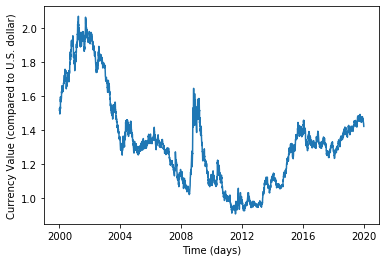

In [16]:
from matplotlib.pyplot import figure
figure(figsize = (10, 20))


fig = plt.figure()
ax = plt.axes()


ax.set_xlabel('Time (days)')
ax.set_ylabel('Currency Value (compared to U.S. dollar)')

ax.plot(np.array(df_c['Date']), np.array(df_c['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));


Now we take an aggregate average over the month.

In [17]:
month = df_c.Date.dt.to_period("M")
df_c_ag = df_c.groupby([df_c.Date.dt.to_period("M")]).mean()
df_c_ag.reset_index(inplace = True)
#df_c_ag['Date'].to_timestamp()
df_c_ag

,Date,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01,10.0,1.523624,0.987362,1.949876,0.609686,1.805443,1.448664,8.279229,7.779055,...,1.675602,7.349286,105.314048,3.800000,8.023143,8.490762,73.138095,1.590455,30.888095,37.384524
1,2000-02,31.0,1.593231,1.016433,2.039455,0.624881,1.776714,1.451407,8.278079,7.781640,...,1.702998,7.568169,109.463333,3.800000,8.235690,8.645952,73.548571,1.633745,30.804643,37.777857
2,2000-03,53.0,1.641087,1.037013,2.040430,0.632948,1.742378,1.460774,8.278561,7.784761,...,1.715343,7.722830,106.307391,3.800000,8.409996,8.697109,73.809565,1.663617,30.719783,37.922609
3,2000-04,74.5,1.677935,1.058630,2.016400,0.631990,1.769625,1.468875,8.279285,7.787990,...,1.709590,7.887180,105.627000,3.800000,8.627190,8.748615,74.122500,1.665650,30.520250,37.992750
4,2000-05,96.0,1.729843,1.102713,2.127717,0.663261,1.828141,1.496098,8.278059,7.790793,...,1.728798,8.223165,108.254783,3.800000,9.048065,9.088730,74.886739,1.717559,30.777609,38.963043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2019-08,5118.5,1.476127,0.898605,1.554373,0.822405,4.021968,1.327314,7.062859,7.841986,...,1.384495,6.703373,106.188636,4.186486,8.965873,9.646714,177.938636,0.978736,31.388636,30.744091
236,2019-09,5140.0,1.468190,0.908302,1.576543,0.809319,4.120905,1.324386,7.116236,7.835329,...,1.379488,6.779110,107.470952,4.183295,9.010352,9.714479,180.745238,0.990474,31.087619,30.560238
237,2019-10,5162.0,1.471274,0.904413,1.578372,0.790335,4.084285,1.318926,7.095561,7.842167,...,1.370476,6.756257,108.160217,4.187389,9.150191,9.769626,181.308261,0.993237,30.700652,30.346739
238,2019-11,5184.0,1.465107,0.905219,1.563702,0.776257,4.160310,1.323833,7.019448,7.827840,...,1.361681,6.763752,108.897143,4.155264,9.151760,9.638464,180.344048,0.993293,30.465238,30.245238


In [18]:
#for later exploration.
#df_w_l = pd.read_csv('/home/hdawg/Labor_currency_project/Preliminary_exploration/ilostat-2020-10-03.csv')

In [19]:
#For later explorations.
#world = df_w_l[df_w_l['ref_area.label'] == 'World']
#df_w_l.head()
#world.head()

Above is a world dataset for possible later use. Below we plot the relative value of the Australian Dollar Versus the U.S. dollar and a normalized 

In [20]:
indi = df_l_a['indicator'].unique()
cl1 = df_l_a['classif1'].unique()
cl2 = df_l_a['classif2'].unique()
su = df_l_a['sex'].unique()
print(len(indi) * len(cl1) * len(cl2) * len(su))

31680


In [21]:
#This cell contains some more preliminary work.

#t = df_l_a[('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11')]
#t_r = t[(t['indicator'] == 'SDG_0552_OCU_RT') & (t['classif1'] == [i for i in t.classif1 if 'TOT' in i])]
#t_r.head()
#print([i for i in t.classif1.unique() if 'TOT' in i])
#t_r[(df_l_a['indicator'] == results[0][0]) & (df_l_a['classif1'] == results[0][1]) & (df_l_a['classif2'] == results[0][2])]

In [22]:
#This makes a combination of the various inidicator, classifier, and sex combinations.
#Note that all indicators potentially have all classifiers and sex disticntions.
#Therefore there are no redundant combinations.

results = []


for i in indi:
    for j in cl1:
        for k in cl2:
            for l in su: 
                #ivar = df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))]
                #dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
                #slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar['obs_value']),dvar)
                #results.append([i,k,j,slope, intercept, r_value, p_value, std_err])
                results.append([i,j,k,l])
            

This will looks for those categories based on indicator, the first classifier, second classifier, and sex break down to see which which factors are most linearly correlated to the currency exchange rates. Note it was a very lengthy process due to the brute force method used and it is a future goal of this project to find more efficient means to find these correlations as well as to look at hire order (up to second order) correlations.

In [23]:
#results2 = []


#for i in indi:
#    for j in cl1:
#        for k in cl2:
#            for l in su: 
#                ivar = df_l_a[(df_l_a['indicator'] == i) & (df_l_a['classif1'] == j) & (df_l_a['classif2'] == k) & (df_l_a['sex'] == l) & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))]
#                #print(len(np.array(ivar['obs_value'])))
#                dvar = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
#                if len(np.array(ivar['obs_value'])) == 240:
#                    slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(ivar['obs_value']),dvar)
##                    results2.append([i, k, j, l, slope, intercept, r_value, p_value, std_err])
#                else:
#                    pass
                #results.append([i,j,k,l])
            

In [24]:
#print(len(results2))

Below we write the results out as a csv to save time in the future.

In [25]:
#df_out = pd.DataFrame(results2)
#df_out.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
#df_out.head()

In [26]:
#df_out.to_csv('outputs.csv')

In [27]:
#we look at the new data frame.

df_op = pd.read_csv('outputs.csv')
df_op = df_op[['indicator', 'classif2', 'classif1', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']]
df_op.columns = ['indicator', 'classif1', 'classif2', 'sex', 'slope', 'intercept', 'r_value', 'p_value', 'std_err']
df_op

,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,-0.000077,2.681734,-0.488918,7.950006e-16,0.000009
1,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,-0.000159,2.711800,-0.500767,1.223767e-16,0.000018
2,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_F,-0.000147,2.651662,-0.477276,4.664887e-15,0.000018
3,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_T,-0.000801,3.699137,-0.626532,1.418705e-27,0.000065
4,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_M,-0.001516,3.614143,-0.627166,1.212720e-27,0.000122
...,...,...,...,...,...,...,...,...,...
664,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_Y15-24,0,SEX_M,-0.036624,2.437018,-0.359235,1.012914e-08,0.006167
665,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_Y15-24,0,SEX_F,-0.031170,2.331935,-0.224831,4.482358e-04,0.008756
666,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_YGE25,0,SEX_T,0.137426,-3.636337,0.660495,1.861781e-31,0.010126
667,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_YGE25,0,SEX_M,0.174833,-3.550808,0.391734,3.170027e-10,0.026618


In [28]:
#double check there are no duplicates.

df_op.drop_duplicates(inplace = True)
df_op

,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
0,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_T,-0.000077,2.681734,-0.488918,7.950006e-16,0.000009
1,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_M,-0.000159,2.711800,-0.500767,1.223767e-16,0.000018
2,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_TOTAL,0,SEX_F,-0.000147,2.651662,-0.477276,4.664887e-15,0.000018
3,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_T,-0.000801,3.699137,-0.626532,1.418705e-27,0.000065
4,POP_XWAP_SEX_AGE_NB,AGE_10YRBANDS_Y15-24,0,SEX_M,-0.001516,3.614143,-0.627166,1.212720e-27,0.000122
...,...,...,...,...,...,...,...,...,...
664,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_Y15-24,0,SEX_M,-0.036624,2.437018,-0.359235,1.012914e-08,0.006167
665,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_Y15-24,0,SEX_F,-0.031170,2.331935,-0.224831,4.482358e-04,0.008756
666,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_YGE25,0,SEX_T,0.137426,-3.636337,0.660495,1.861781e-31,0.010126
667,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_YGE25,0,SEX_M,0.174833,-3.550808,0.391734,3.170027e-10,0.026618


In [29]:
#We look at the values with the highest r-value. 

top_r = df_op.nlargest(20, 'r_value')


In [30]:
top_r


,indicator,classif1,classif2,sex,slope,intercept,r_value,p_value,std_err
637,EIP_DWAP_SEX_AGE_RT,AGE_10YRBANDS_Y55-64,0,SEX_M,0.044101,-0.053888,0.708836,6.089441e-38,0.002845
652,EIP_DWAP_SEX_AGE_RT,AGE_AGGREGATE_Y55-64,0,SEX_M,0.044101,-0.053888,0.708836,6.089441e-38,0.002845
635,EIP_DWAP_SEX_AGE_RT,AGE_10YRBANDS_Y45-54,0,SEX_F,0.062062,-0.124800,0.672328,6.251428e-33,0.004429
633,EIP_DWAP_SEX_AGE_RT,AGE_10YRBANDS_Y45-54,0,SEX_T,0.109129,-0.605606,0.669650,1.366021e-32,0.007845
636,EIP_DWAP_SEX_AGE_RT,AGE_10YRBANDS_Y55-64,0,SEX_T,0.029381,0.142884,0.667283,2.708564e-32,0.002126
651,EIP_DWAP_SEX_AGE_RT,AGE_AGGREGATE_Y55-64,0,SEX_T,0.029381,0.142884,0.667283,2.708564e-32,0.002126
666,EIP_DWAP_SEX_AGE_RT,AGE_YTHADULT_YGE25,0,SEX_T,0.137426,-3.636337,0.660495,1.861781e-31,0.010126
463,UNE_TUNE_SEX_AGE_DUR_NB,AGE_YTHADULT_YGE15,DUR_DETAILS_MGE24,SEX_M,0.013124,0.784670,0.647175,7.099783e-30,0.001002
638,EIP_DWAP_SEX_AGE_RT,AGE_10YRBANDS_Y55-64,0,SEX_F,0.021096,0.288452,0.639455,5.398456e-29,0.001644
653,EIP_DWAP_SEX_AGE_RT,AGE_AGGREGATE_Y55-64,0,SEX_F,0.021096,0.288452,0.639455,5.398456e-29,0.001644


We notice that the most correlated indicator is EIP_DWAP_SEX_AGE_RT which is the indicator for economic inactivity. Below we will plot the relative value of the Australian dollar against the U.S. dollar and the value of the highest r-valued row (indicator = EIP_DWAP_SEX_AGE_RT, classif1 = AGE_10YRBANDS_Y55-64, classif2 = 0, sex = SEX_M) normalized by dividing by the mean.

In [31]:
top_r['indicator'].unique()

array(['EIP_DWAP_SEX_AGE_RT', 'UNE_TUNE_SEX_AGE_DUR_NB',
       'UNE_DEAP_SEX_AGE_RT', 'EMP_TEMP_SEX_STE_DT',
       'UNE_DEA1_SEX_AGE_RT'], dtype=object)

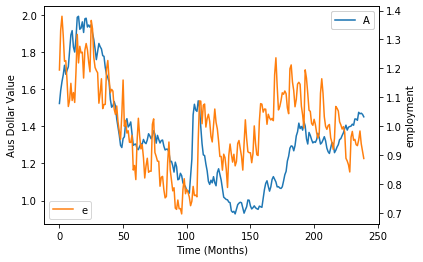

In [77]:
fig = plt.figure()
#ax = plt.axes()
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time (Months)')
ax1.set_ylabel('Aus Dollar Value')
ax1.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']), label = 'aus dollar')
#ax1.tick_params(axis='y')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('employment')  # we already handled the x-label with ax1
ax2.plot(df_c_ag.index, np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_T') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value)/np.array(df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_T') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value).mean(), color = color, label = 'employment')
ax2.tick_params(axis='y')

leg1 = ax1.legend('Aus Dollar')
leg2 = ax2.legend('employment', loc = 'lower left')
#ax1.add_artist(leg1)
#ax2.add_artist(leg2)
#leg1.get_lines()[0].set_lw(1)
#leg2.get_lines()[0].set_lw(1)
#ax.plot(np.array(df_c_ag['Date']), np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));
ax1.add_artist(leg1)
#ax.plot(df_c_ag.index, np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']));


We see from above that many of the predictors are from the same indicators. We will naively assume some linear combination of the indicators might make a better predictor than a single one. We will make an attempt to do a linear and ridge regression on the data and see if we get any improved results.

In [33]:
fac1 = df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_T') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value
fac2 = df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value
fac3 = df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value
fac4 = df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value
fac5 = df_l_a[(df_l_a['indicator'] == 'UNE_DEA1_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_AGGREGATE_Y25-54') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value

fac1n = df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y55-64') & (df_l_a['sex'] == 'SEX_T') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value/fac1.mean()
fac2n = df_l_a[(df_l_a['indicator'] == 'UNE_TUNE_SEX_AGE_DUR_NB') & (df_l_a['classif2'] == 'DUR_DETAILS_MGE24') & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE15') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value/fac2.mean()
fac3n = df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value/fac3.mean()
fac4n = df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value/fac4.mean()
fac5 = df_l_a[(df_l_a['indicator'] == 'UNE_DEA1_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_AGGREGATE_Y25-54') & (df_l_a['sex'] == 'SEX_M') & (('1999-12' <= df_l_a['time']) & ( df_l_a['time'] <= '2019-11'))].obs_value



LAU = [list(fac1),list(fac2),list(fac3),list(fac4)]

#AUS = zip(LAU[:])
AUS = zip(list(fac1),list(fac2),list(fac3),list(fac4))
AUSn = zip(list(fac1n),list(fac2n),list(fac3n),list(fac4n))
#AUS = zip(list(fac1),list(fac2))
zAUS = list(AUS)
zAUSn = list(AUSn)
zfAUS = zAUS[:]
zfAUSn = zAUSn[:]


In [34]:
print(len(fac1), len(fac2), len(fac3), len(fac4), len(fac1n), len(fac2n), len(fac3n), len(fac4n), len(zAUS))

240 240 240 240 240 240 240 240 240


In [35]:
#df_l_ca = pd.read_csv('/home/hdawg/Labor_currency_project/CAN_M.csv')


In [36]:
#df_l_ca.fillna(0, inplace = True)

In [37]:
#df_l_ca.tail()

In [38]:
#df_l_ca['time'] = df_l_ca['time'].str.replace('M','-')
#df_l_ca['time'] = pd.to_datetime(df_l_ca['time'])
#df_l_ca['time'] = df_l_ca['time'].dt.to_period('M')

In [39]:
#fac1_ca = df_l_ca[(df_l_ca['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_ca['classif2'] == 0) & (df_l_ca['classif1'] == 'AGE_10YRBANDS_Y45-54') & (df_l_ca['sex'] == 'SEX_T') & (('1999-12' <= df_l_ca['time']) & ( df_l_ca['time'] <= '2019-11'))].obs_value
#fac2_ca = df_l_ca[(df_l_ca['indicator'] == 'UNE_DEA1_SEX_AGE_RT') & (df_l_ca['classif2'] == 0) & (df_l_ca['classif1'] == 'AGE_AGGREGATE_Y25-54') & (df_l_ca['sex'] == 'SEX_T') & (('1999-12' <= df_l_ca['time']) & ( df_l_ca['time'] <= '2019-11'))].obs_value
#fac3_ca = df_l_ca[(df_l_ca['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_ca['classif2'] == 0) & (df_l_ca['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_ca['sex'] == 'SEX_F') & (('1999-12' <= df_l_ca['time']) & ( df_l_ca['time'] <= '2019-11'))].obs_value
#fac4_ca = df_l_ca[(df_l_ca['indicator'] == 'UNE_DEA1_SEX_AGE_RT') & (df_l_ca['classif2'] == 0) & (df_l_ca['classif1'] == 'AGE_AGGREGATE_Y55-64') & (df_l_ca['sex'] == 'SEX_M') & (('1999-12' <= df_l_ca['time']) & ( df_l_ca['time'] <= '2019-11'))].obs_value
#fac5_ca = df_l_ca[(df_l_ca['indicator'] == 'UNE_DEA1_SEX_AGE_RT') & (df_l_ca['classif2'] == 0) & (df_l_ca['classif1'] == 'AGE_AGGREGATE_Y25-54') & (df_l_ca['sex'] == 'SEX_M') & (('1999-12' <= df_l_ca['time']) & ( df_l_ca['time'] <= '2019-11'))].obs_value

#LCA = [list(fac1_ca),list(fac2_ca),list(fac3_ca),list(fac4_ca), list(fac5_ca)]

#CAN = zip(LCA[:])



#CAN = zip(list(fac1_ca),list(fac2_ca),list(fac3_ca),list(fac4_ca))
#CAN = zip(list(fac1_ca),list(fac2_ca))
#zCAN = list(CAN)
#zfCAN = zCAN[:]

In [40]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV




In [41]:
clf = LinearRegression(fit_intercept = False)
clf.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred1 = clf.predict(np.array(zfAUS[202:]))
print(len(np.array(pred1)), len(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:]), pred1.reshape(1,-1).shape)
#print(clf.score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']).reshape(-1, 1)[202:],pred1.reshape(1,-1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:], pred1))

38 38 (1, 38)
-10.757505471431005


In [42]:
clfn = LinearRegression(fit_intercept = False)
clfn.fit(zfAUSn[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred1n = clfn.predict(np.array(zfAUSn[202:]))
print(len(np.array(pred1n)), len(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:]), pred1n.reshape(1,-1).shape)
#print(clf.score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']).reshape(-1, 1)[202:],pred1.reshape(1,-1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:], pred1n))

38 38 (1, 38)
-10.757505471430893


In [43]:
#jp = np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
#print(jp[201:], np.array(pred1))
#print(sk.metrics.r2_score(y_test_4, pred1), sk.metrics.mean_absolute_error(y_test_4, pred1), sk.metrics.mean_absolute_error(y_test_4, pred1)/np.mean(y_test_4))


In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


clf1 = Ridge()
pars = {'alpha': [.001, .001, .01, .1, 1, 2, 5]}
CV_clf1 = GridSearchCV(estimator=clf1, param_grid = pars, scoring = 'neg_mean_absolute_error', cv= 5)
CV_clf1.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
CV_clf1.best_params_

/home/hdawg/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 5}

In [45]:
clf1 = Ridge(alpha = 5, fit_intercept = False)
clf1.fit(zfAUS[:201], np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:201])
pred1 = clf1.predict(zfAUS[202:])
#print(clf.score(np.asarray(y_test_4), np.array(pred1)))
print(sk.metrics.r2_score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:], pred1), sk.metrics.mean_absolute_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:], pred1), sk.metrics.mean_absolute_error(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:], pred1)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[202:]))
#print(clf2.score(X_test_4, np.asarray(y_test_4)))


-9.921005970128872 0.19690486914107655 0.14477767154659602


In [46]:
dates1 = [['2000-01', '2019-12'], ['1999-12', '2019-11'],['1998-12', '2018-11'], ['1994-12', '2014-11'], ['1993-12', '2013-11'], ['1991-12', '2011-11']]
#dates2 = [['2000-01', '2014-12'],['1998-12', '2013-12'], ['1994-12', '2009-12'], ['1993-12', '2008-12'], ['1991-12', '2006-12']]
for i in dates1:
    fac1v = df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y45-54') & (df_l_a['sex'] == 'SEX_T') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    fac2v = df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    fac3v = df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    fac4v = df_l_a[(df_l_a['indicator'] == 'UNE_DEA1_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_AGGREGATE_Y55-64') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    

    #LAUv = [list(fac1),list(fac2),list(fac3),list(fac4), list(fac5)]

    #AUS = zip(LAU[:])
    AUSv = zip(list(fac1v),list(fac2v),list(fac3v),list(fac4v))
    #AUS = zip(list(fac1),list(fac2))
    zAUSv = list(AUSv)
    zfAUSv = zAUSv[:]
    #print(len(fac1v), len(fac2v), len(fac3v), len(fac4v), len(zfAUSv))
    
    clfv = LinearRegression(fit_intercept = False)
    clfv.fit(zfAUSv[:200], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] < '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:200].reshape(-1,1))
    pred1v = clfv.predict(np.array(zfAUSv[200:]))
    print(len(np.array(pred1v)), len(fac1v), len(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] < '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])), pred1v.reshape(1,-1).shape)
    #print(clf.score(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$']).reshape(-1, 1)[202:],pred1.reshape(1,-1)))
    print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[200:], pred1v))
    

40 240 240 (1, 40)
-3.847421046039562
40 240 240 (1, 40)
-3.979068399470772
40 240 240 (1, 40)
-4.548339241694198
40 240 240 (1, 40)
-14.459702353428254
40 240 240 (1, 40)
-19.24147973272623
40 240 240 (1, 40)
-28.60813398050965


In [47]:
for i in dates1:
    fac1v = df_l_a[(df_l_a['indicator'] == 'EIP_DWAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_10YRBANDS_Y45-54') & (df_l_a['sex'] == 'SEX_T') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    fac2v = df_l_a[(df_l_a['indicator'] == 'UNE_DEAP_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_YTHADULT_YGE25') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    fac3v = df_l_a[(df_l_a['indicator'] == 'EMP_TEMP_SEX_STE_DT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'STE_AGGREGATE_SLF') & (df_l_a['sex'] == 'SEX_F') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    fac4v = df_l_a[(df_l_a['indicator'] == 'UNE_DEA1_SEX_AGE_RT') & (df_l_a['classif2'] == 0) & (df_l_a['classif1'] == 'AGE_AGGREGATE_Y55-64') & (df_l_a['sex'] == 'SEX_M') & ((i[0] <= df_l_a['time']) & ( df_l_a['time'] <= i[1]))].obs_value
    

    #LAUv = [list(fac1),list(fac2),list(fac3),list(fac4), list(fac5)]

    #AUS = zip(LAU[:])
    AUSv = zip(list(fac1v),list(fac2v),list(fac3v),list(fac4v))
    #AUS = zip(list(fac1),list(fac2))
    zAUSv = list(AUSv)
    zfAUSv = zAUSv[:]
    #print(len(fac1v), len(fac2v), len(fac3v), len(fac4v), len(zfAUSv))
    
    clf1v = Ridge(alpha = 5, fit_intercept = False)
    clf1v.fit(zfAUSv[:200], np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[:200])
    pred2v = clf1v.predict(zfAUSv[200:])
    #print(clf.score(np.asarray(y_test_4), np.array(pred1)))
    print(sk.metrics.r2_score(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[200:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[200:], pred2v), sk.metrics.mean_absolute_error(np.array(df_c_ag[(('2000-01' <= df_c_ag['Date']) & ( df_c_ag['Date'] <= '2020-01'))]['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[200:], pred2v)/np.mean(np.array(df_c_ag['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])[200:]))
    #print(clf2.score(X_test_4, np.asarray(y_test_4)))

-3.879384803290515 0.1062683348465363 0.07826362043184017
-4.011371021631756 0.10857080488639377 0.0799593244392034
-4.460471003421073 0.13030570723554136 0.09596646476029069
-14.205332167725452 0.24449509682989498 0.18006371778925634
-19.285028839218977 0.2796535525836676 0.2059569252066547
-27.917976712760925 0.3404164842208946 0.2507071043155051
